# Study Case Credit Scoring

## Informasi Data
Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).

## Tujuan Pemodelan
Memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.

## Penilian
1. Memahami kasus dan tujuan pemodelan
2. Memahami makna setiap feature
3. Memahami pola data
4. Dapat menjelaskan hubungan antara feature dengan label
5. Identifikasi data ekstrim / outliers
6. Memahami tujuan transformasi data
7. Mengetahui teknik-teknik transformasi data
8. Dapat mengidentifikasi dampak dari transformasi data
9. Dapat melakukan pemodelan (model klasifikasi)
10. Memahami ukuran kebaikan model
11. Dapat membandingkan ukuran kebaikan antara beberapa model

## Import Library
Import library yang akan digunakan untuk proses pembuatan model credit scoring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

## Load Training Dataset
Load training dataset yang akan digunakan sebagai model

Deskripsi features di dataset:
1. ID = nomor urut pelanggan
2. LIMIT_BAL = Batas maksimal kredit
3. Marriage = status pernikahan (1,2,3)
4. education = status pendidikan (1,2,3,4)
5. Sex = jenis kelamin (1,2)
6. Age = umur
7. Pay = pembayaran telat atau tidak di bulan 1,2,3
8. bill amt = jumlah tagihan bulan 1,2,3
9. pay amt = jumlah bayar bulan 1,2,3
10. target = terlambat atau tidak

In [2]:
df = pd.read_csv('training.csv')

## Sneak Peak to Data

In [3]:
df.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


In [5]:
df.shape #ada 16625 data dengan 16 features

(16625, 16)

In [6]:
df.columns #nama kolom

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'EDUCATION', 'SEX', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'TARGET'],
      dtype='object')

In [7]:
df.describe() #stats description of our data

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,8313.000000,157608.781955,1.476932,2.117534,1.588752,43.373955,0.482226,0.430256,0.397293,50720.634827,48815.920662,46471.030556,5175.054075,4973.786105,4830.003368,0.399158
std,4799.368448,124931.062684,0.523590,0.791191,0.492075,8.777974,0.835516,0.881835,0.853110,73365.449060,70753.129768,68182.984755,15033.589318,14867.362888,15646.002915,0.489740
min,1.000000,0.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-61506.000000,0.000000,0.000000,0.000000,0.000000
25%,4157.000000,50000.000000,1.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,3491.000000,2997.000000,2550.000000,566.000000,451.000000,306.000000,0.000000
50%,8313.000000,120000.000000,1.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,21943.000000,20987.000000,19954.000000,2000.000000,2000.000000,1637.000000,0.000000
75%,12469.000000,230000.000000,2.000000,3.000000,2.000000,49.000000,1.000000,0.000000,0.000000,65903.000000,62725.000000,59111.000000,5000.000000,4696.000000,4025.000000,1.000000
max,16625.000000,800000.000000,3.000000,4.000000,2.000000,72.000000,4.000000,4.000000,4.000000,746814.000000,646770.000000,693131.000000,505000.000000,384986.000000,508229.000000,1.000000


## Handling Missing Values

In [8]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
TARGET       0
dtype: int64

- Ternyata datasetnya sudah clean dan tidak perlu untuk melakukan treatment untuk missing values

## Data Understanding Univariate Analysis

0    9989
1    6636
Name: TARGET, dtype: int64


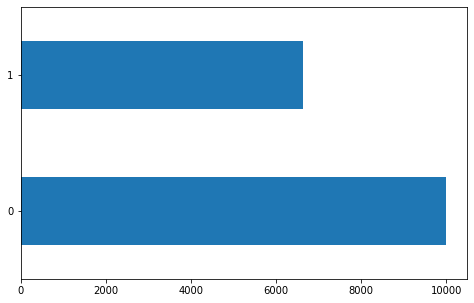

In [9]:
plt.figure(figsize=(8,5))
print(df['TARGET'].value_counts())
df['TARGET'].value_counts().plot('barh')

- Dapat dilihat bahwa distribusi dari nilai 0 dan 1 adalah sedikit balance dan tidak ada ketimpangan disini

1    8901
2    7519
3     205
Name: MARRIAGE, dtype: int64


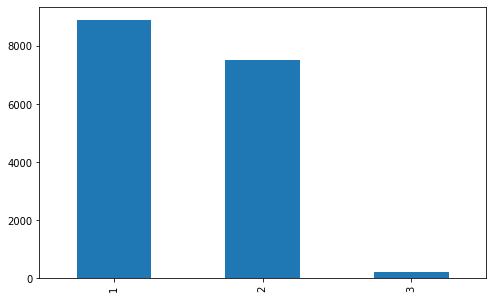

In [10]:
plt.figure(figsize=(8,5))
print(df['MARRIAGE'].value_counts())
df['MARRIAGE'].value_counts().plot('bar')

- Ternyata nilai 1 atau belum menikah mendominasi dan hanya sedikit yang status pernikahan lainya
- Mungkin features ini bisa diubah ke dummies

2    6925
3    5359
1    4029
4     312
Name: EDUCATION, dtype: int64


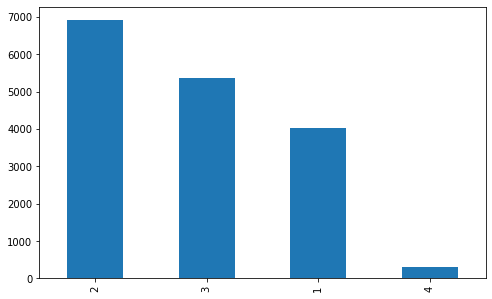

In [11]:
plt.figure(figsize=(8,5))
print(df['EDUCATION'].value_counts())
df['EDUCATION'].value_counts().plot('bar')

- Ternyata data didominasi oleh peminjam kredit dengan status pendidikan Diploma/S1
- Bisa dijadikan dummies juga features ini

2    9788
1    6837
Name: SEX, dtype: int64


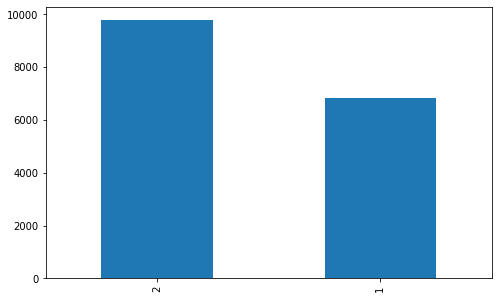

In [12]:
plt.figure(figsize=(8,5))
print(df['SEX'].value_counts())
df['SEX'].value_counts().plot('bar')

- untuk features jenis kelamin didominasi oleh wanita
- bisa di dummies juga features ini

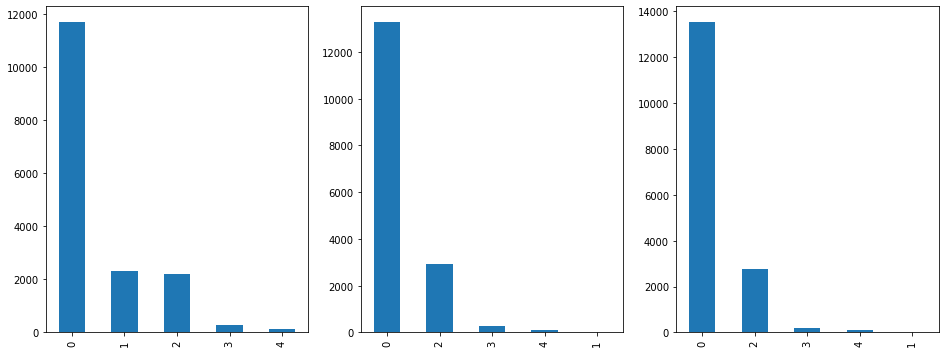

In [13]:
f = plt.figure(figsize=(16,6))

f.add_subplot(1,3,1)
df['PAY_1'].value_counts().plot('bar')

f.add_subplot(1,3,2)
df['PAY_2'].value_counts().plot('bar')

f.add_subplot(1,3,3)
df['PAY_3'].value_counts().plot('bar')

- Pola pembayaran bulan 1,2 dan 3 hampir sama yaitu sebagian besar customer membayar tepat waktu

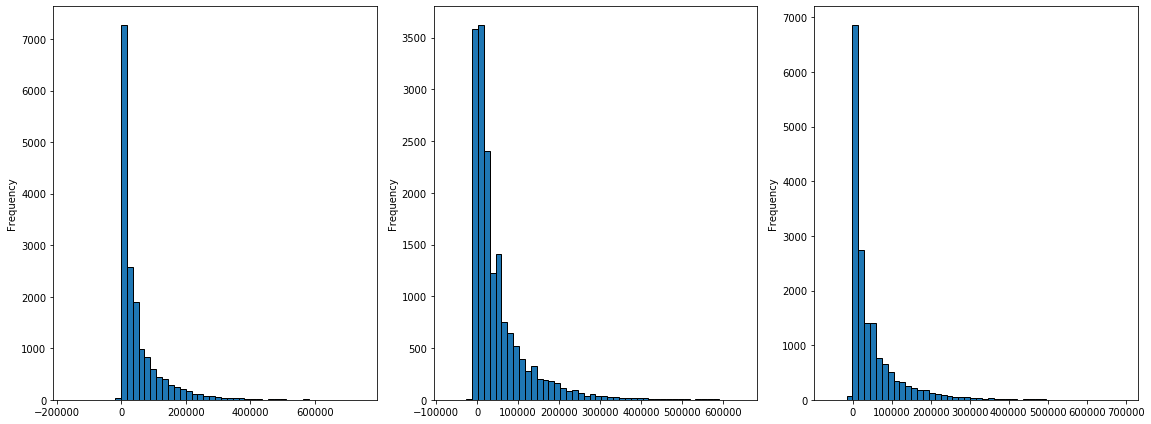

In [14]:
f = plt.figure(figsize=(16,6))

f.add_subplot(1,3,1)
df['BILL_AMT1'].plot.hist(bins=50, edgecolor='black')

f.add_subplot(1,3,2)
df['BILL_AMT2'].plot.hist(bins=50, edgecolor='black')

f.add_subplot(1,3,3)
df['BILL_AMT3'].plot.hist(bins=50, edgecolor='black')

f.tight_layout()

- dapat dilihat dari jumlah tagihan selama bulan 1,2 dan 3 didapat densitynya itu dibawah angka 100.000
- data diatas 300.000 bisa dicut off

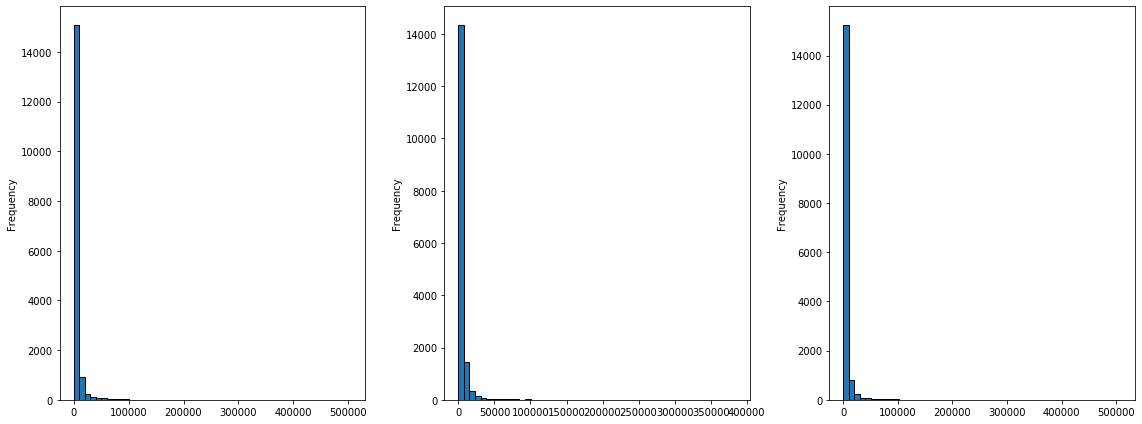

In [15]:
f = plt.figure(figsize=(16,6))

f.add_subplot(1,3,1)
df['PAY_AMT1'].plot.hist(bins=50, edgecolor='black')

f.add_subplot(1,3,2)
df['PAY_AMT2'].plot.hist(bins=50, edgecolor='black')

f.add_subplot(1,3,3)
df['PAY_AMT3'].plot.hist(bins=50, edgecolor='black')

f.tight_layout()

- dapat dilihat dari jumlah pembayaran tagihan selama bulan 1,2 dan 3 didapat densitynya itu dibawah angka 50.000
- data diatas 50.000 bisa dicut off

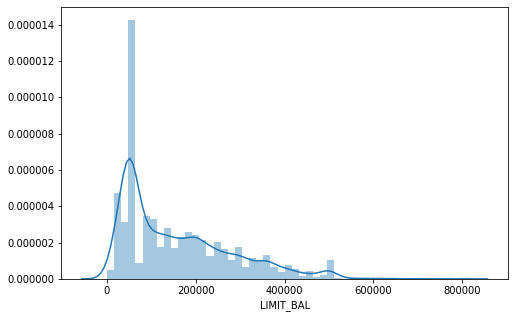

In [16]:
plt.figure(figsize=(8,5))
sns.distplot(df['LIMIT_BAL'])

- nilai limit balance terlalu skewed dan perlu kita berikan treatment untuk mengurangi skewness

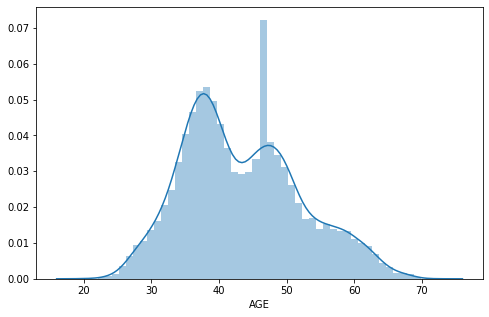

In [17]:
plt.figure(figsize=(8,5))
sns.distplot(df['AGE'])

- sepertinya distribusinya memiliki 2 peak atau bimodal dengan data terpusat di antara 30 - 55 tahun

#### Conclusions:
1. Distribusi data fine dan tidak ada anomalies. 
2. fitur dari LIMIT_BAL sangat skewed dan harus kita modifikasi. 
3. data di BILL_AMT,PAY_AMT akan di cut off yang memiliki data sangat tinggi.

## Data Understanding Bivariate Analysis

- kolom ID kita drop dulu

In [18]:
df.drop(columns='ID', inplace=True)

In [19]:
df.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [20]:
#dibagi dulu data yang kategorikal dengan data yang numerikal karena metode korelasinya berbeda
kategorikal = ['MARRIAGE', 'EDUCATION', 'SEX', 'TARGET']
numerical = ['AGE', 'LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'TARGET']

In [21]:
df[kategorikal].corr(method='spearman').style.background_gradient().set_precision(2)

,MARRIAGE,EDUCATION,SEX,TARGET
MARRIAGE,1,0.14,0.008,-0.097
EDUCATION,0.14,1,-0.14,0.11
SEX,0.008,-0.14,1,-0.19
TARGET,-0.097,0.11,-0.19,1


In [22]:
df[numerical].corr().style.background_gradient().set_precision(2)

,AGE,LIMIT_BAL,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
AGE,1,0.22,0.094,0.078,0.065,0.0038,0.0055,0.0082,-0.02,-0.019,-0.0036,0.22
LIMIT_BAL,0.22,1,-0.13,-0.13,-0.13,0.18,0.17,0.18,0.17,0.17,0.17,-0.2
PAY_1,0.094,-0.13,1,0.68,0.52,0.018,0.031,0.035,-0.088,-0.081,-0.073,0.42
PAY_2,0.078,-0.13,0.68,1,0.69,0.019,0.025,0.034,-0.11,-0.081,-0.072,0.34
PAY_3,0.065,-0.13,0.52,0.69,1,-0.014,0.0096,0.017,-0.044,-0.11,-0.07,0.3
BILL_AMT1,0.0038,0.18,0.018,0.019,-0.014,1,0.95,0.91,0.14,0.15,0.16,-0.025
BILL_AMT2,0.0055,0.17,0.031,0.025,0.0096,0.95,1,0.95,0.3,0.14,0.15,-0.018
BILL_AMT3,0.0082,0.18,0.035,0.034,0.017,0.91,0.95,1,0.26,0.3,0.12,-0.015
PAY_AMT1,-0.02,0.17,-0.088,-0.11,-0.044,0.14,0.3,0.26,1,0.18,0.17,-0.096
PAY_AMT2,-0.019,0.17,-0.081,-0.081,-0.11,0.15,0.14,0.3,0.18,1,0.18,-0.087


Dari heatmap dan correlation bisa dilihat bahwa ada beberapa features yang mempengaruhi nilai dari Target yaitu:
1. LIMIT_BAL = mempunyai korelasi negatif sebesar 0.2, jadi semakin tinggi nilai LIMIT_BAL maka akan semakin tinggi pula dia akan tidak terlambat bayar
2. EDUCATION = mempunyai korelasi positif sebesar 0.11, jadi semakin tinggi nilai EDUCATION maka akan semakin tinggi pula dia akan terlambat bayar
3. SEX = mempunyai korelasi negatif sebesar -0.19, jadi semakin tinggi nilai SEX maka akan semakin tinggi pula dia akan tidak terlambat bayar
4. AGE = mempunyai korelasi positif sebesar 0.22, jadi semakin tinggi nilai AGE maka akan semakin tinggi pula dia akan terlambat bayar
5. PAY_1 = mempunyai korelasi positif sebesar 0.42, jadi semakin tinggi nilai PAY_1 maka akan semakin tinggi pula dia akan terlambat bayar
6. PAY_2 = mempunyai korelasi positif sebesar 0.34, jadi semakin tinggi nilai PAY_2 maka akan semakin tinggi pula dia akan terlambat bayar
7. PAY_3 = mempunyai korelasi positif sebesar 0.3, jadi semakin tinggi nilai PAY_2 maka akan semakin tinggi pula dia akan terlambat bayar
8. features BILL_AMT 1,2, dan 3 memiliki korelasi yang sangat tinggi satu sama lain. hal ini mungkin karena jumlah pembayaran pada bulan sebelumnya akan mempengaruhi jumlah pembayaran pada bulan berikutnya. perlu ditangani nih
9. features PAY_1,2, dan 3 juga memiliki korelasi yang sangat tinggi. hal ini mungkin karena ketika pada bulan 1 customer itu telat membayar, maka akan mempengaruhi pembayaran pada bulan berikutnya. perlu ditangani juga

### Visualization for numerical features

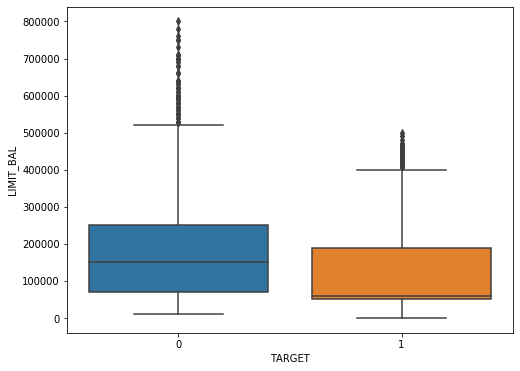

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['LIMIT_BAL'], x=df['TARGET'])

- ternyata untuk target 0 dapat dilihat bahwa memiliki median yang lebih tinggi jika dibandingkan target 1 yang telat membayar

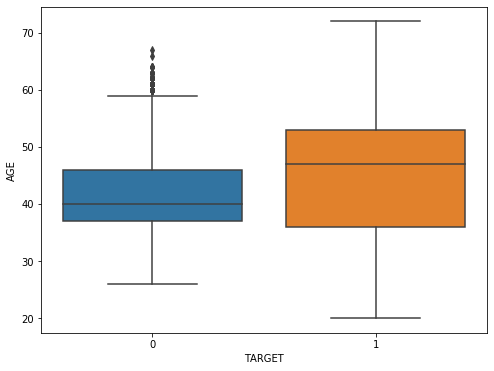

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['AGE'], x=df['TARGET'])

- dapat dilihat bahwa target yang telat membayar memiliki density diantara umur 50 tahun sedangkan yang membayar tepat waktu pada umur kisaran 40 tahun

### Visualization for categorical features

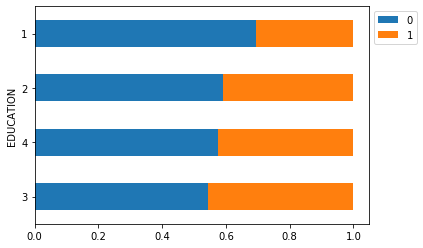

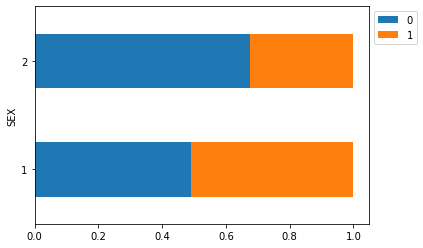

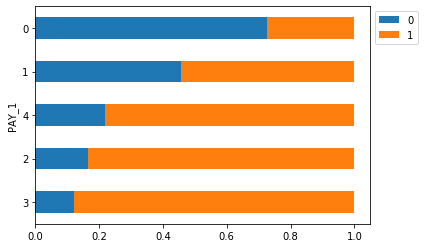

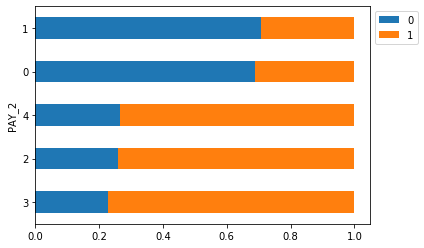

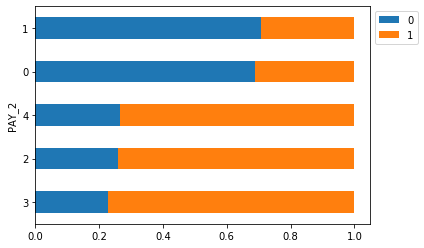

In [25]:
education = pd.crosstab(df['EDUCATION'],df['TARGET'], normalize=0)  
sex = pd.crosstab(df['SEX'],df['TARGET'], normalize=0)
pay_1 = pd.crosstab(df['PAY_1'],df['TARGET'], normalize=0)
pay_2 = pd.crosstab(df['PAY_2'],df['TARGET'], normalize=0)
pay_3 = pd.crosstab(df['PAY_3'],df['TARGET'], normalize=0)

education.sort_values(by=0,inplace=True)
sex.sort_values(by=0,inplace=True)
pay_1.sort_values(by=0,inplace=True)
pay_2.sort_values(by=0,inplace=True)
pay_3.sort_values(by=0,inplace=True)

education.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

sex.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

pay_1.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

pay_2.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

pay_2.plot(kind='barh',stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

1. semakin tinggi pendidikan seseorang, maka semakin kecil kemungkinan dia untuk telat bayar pinjaman.
2. kemungkinan wanita akan membayar pinjaman tepat waktu dibandingkan dengan pria.
3. sebagian besar peminjam akan membayar tepat waktu pada bulan pertama namun di bulan ke 2 dan ke 3 akan memiliki kemungkinan pembayaran telat selama 1 bulan

## Modelling First Try
pemodelan ini menggunakan dataset yang featurenya belum kita engineering

In [26]:
df.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


### Create x and y variables

In [27]:
x = df.drop(columns=['TARGET'])
x.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0


In [28]:
y = df['TARGET']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

### Split Dataset into 2 set : Train and Test
proporsi training adalah 80:20

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13300, 14)
(13300,)
(3325, 14)
(3325,)


### First try - use Decision Tree Classifier

In [31]:
dtree = DecisionTreeClassifier()

In [32]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
y_pred1 = dtree.predict(x_test)
y_pred1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
a1 = accuracy_score(y_test, y_pred1)
p1 = precision_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')
r1 = recall_score(y_test, y_pred1, average='macro')
print(a1)
print(p1)
print(f1)
print(r1)

0.841203007518797
0.83114779359583
0.8318294154836485
0.8325452155007899


### Second try - use Logistic Regression

In [35]:
logreg = LogisticRegression(penalty='l1') #menggunakan l1 menghapus feature yang tidak penting

In [36]:
logreg.fit(x_train, y_train)

F:\Anaconda\envs\pandas\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred2 = logreg.predict(x_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
a2 = accuracy_score(y_test, y_pred2)
p2 = precision_score(y_test, y_pred2, average='macro')
f2 = f1_score(y_test, y_pred2, average='macro')
r2 = recall_score(y_test, y_pred2, average='macro')
print(a2)
print(p2)
print(f2)
print(r2)

0.7548872180451128
0.7446699213489427
0.7286453299960176
0.7218414425954554


### Third try - Naive Bayes

In [39]:
naive = GaussianNB()

In [40]:
naive.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_pred3 = naive.predict(x_test)
y_pred3

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [42]:
a3 = accuracy_score(y_test, y_pred3)
p3 = precision_score(y_test, y_pred3, average='macro')
f3 = f1_score(y_test, y_pred3, average='macro')
r3 = recall_score(y_test, y_pred3, average='macro')
print(a3)
print(p3)
print(f3)
print(r3)

0.5494736842105263
0.6755499726948662
0.5367523361182973
0.6254088421253109


### Fourth Try - KNN

In [43]:
k_range = range(1,25)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.7332330827067669, 0.7584962406015038, 0.7615037593984962, 0.7693233082706767, 0.7738345864661654, 0.7744360902255639, 0.7714285714285715, 0.7765413533834586, 0.7735338345864662, 0.7780451127819549, 0.7735338345864662, 0.7759398496240602, 0.7735338345864662, 0.7756390977443609, 0.7777443609022556, 0.7777443609022556, 0.7723308270676692, 0.7780451127819549, 0.7744360902255639, 0.7753383458646617, 0.7741353383458647, 0.7729323308270677, 0.7747368421052632, 0.7771428571428571]


Text(0, 0.5, 'Testing Accuracy')

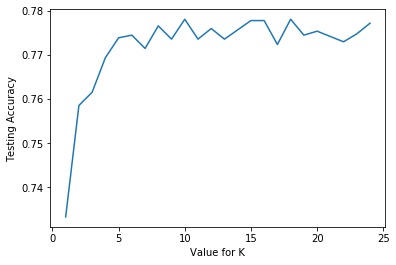

In [44]:
plt.plot(k_range, scores)
plt.xlabel('Value for K')
plt.ylabel('Testing Accuracy')

In [45]:
knn_23 = KNeighborsClassifier(n_neighbors=23)

In [46]:
knn_23.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [47]:
y_pred4 = knn_23.predict(x_test)
y_pred4

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [48]:
a4 = accuracy_score(y_test, y_pred4)
p4 = precision_score(y_test, y_pred4, average='macro')
f4 = f1_score(y_test, y_pred4, average='macro')
r4 = recall_score(y_test, y_pred4, average='macro')
print(a4)
print(p4)
print(f4)
print(r4)

0.7747368421052632
0.7623420171671429
0.7569279570548404
0.7531853015736246


### Five Try - Random Forest

In [49]:
randomf = RandomForestClassifier()

In [50]:
randomf.fit(x_train, y_train)

F:\Anaconda\envs\pandas\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred5 = randomf.predict(x_test)
y_pred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
a5 = accuracy_score(y_test, y_pred5)
p5 = precision_score(y_test, y_pred5, average='macro')
f5 = f1_score(y_test, y_pred5, average='macro')
r5 = recall_score(y_test, y_pred5, average='macro')
print(a5)
print(p5)
print(f5)
print(r5)

0.8718796992481203
0.8699309108434967
0.8614814197633729
0.8554376866620128


### Summarizing Score for First Try Modelling

In [53]:
score_1 = pd.DataFrame({
    'Model': ['Decision Tree','Logistic Regression', 'Naive Bayes', 'KNN', 'Random Forest'],
    'Accuracy Score': [a1,a2,a3,a4,a5],
    'Recall Score' : [r1,r2,r3,r4,r5],
    'F1 Score' : [f1,f2,f3,f4,f5],
    'Precision Score' : [p1,p2,p3,p3,p4]
})
score_1

,Model,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Decision Tree,0.841203,0.832545,0.831829,0.831148
1,Logistic Regression,0.754887,0.721841,0.728645,0.744670
2,Naive Bayes,0.549474,0.625409,0.536752,0.675550
3,KNN,0.774737,0.753185,0.756928,0.675550
4,Random Forest,0.871880,0.855438,0.861481,0.762342


### Conclusion First Try Modelling
1. Dari tabel score pengukuran kebaikan model, algoritma machine learning dapat dibagi menjadi 3 tier:
    1. tier 1 yaitu yang nilai akurasinya diatas 80% yaitu algoritma Decision Tree dan Random Forest
    2. tier 2 yaitu yang nilai akurasinya diantara 70-80% yatu algoritma Logistic Regression dan KNN
    3. tier 3 yaitu yang nilai akurasinya dibawah 70% yaitu Naive Bayes

## Modelling Second Try with Feature Engineering

In [54]:
df.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


### Outliers Detection
features yang akan dideteksi adalah BILL_AMT dan PAY_AMT

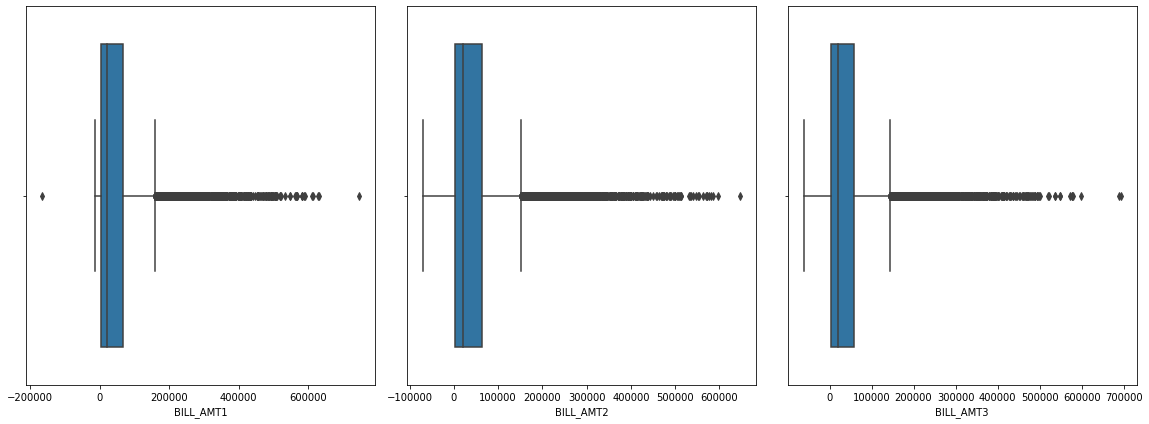

In [55]:
f = plt.figure(figsize=(16,6))

f.add_subplot(1,3,1)
sns.boxplot(df['BILL_AMT1'])

f.add_subplot(1,3,2)
sns.boxplot(df['BILL_AMT2'])

f.add_subplot(1,3,3)
sns.boxplot(df['BILL_AMT3'])

f.tight_layout()

Data minus akan di drop

In [56]:
df['BILL_AMT1'] = df[df['BILL_AMT1'] > 0]

In [57]:
df['BILL_AMT2'] = df[df['BILL_AMT2'] > 0]

In [58]:
df['BILL_AMT3'] = df[df['BILL_AMT3'] > 0]

In [59]:
df.dropna(inplace=True)

In [60]:
#wow setelah data minus dihilangkan ternyata BILL_AMT1,2,dan 3 sama datanta! kita drop skuy
df = df.drop(columns=['BILL_AMT2','BILL_AMT3'])

In [61]:
df.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,30000.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,20000.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,20000.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,20000.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,170000.0,18500.0,13998.0,3760.0,0


Data yang diatas 500.000 akan dijadikan kedalam 500.000

In [62]:
df.loc[df["BILL_AMT1"]>=500000,"BILL_AMT1"] = 500000

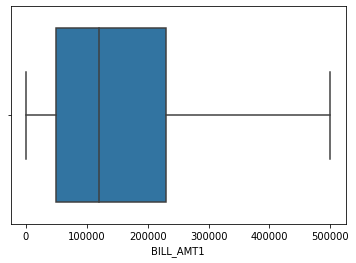

In [63]:
sns.boxplot(df['BILL_AMT1'])

### Transformasi nilai LIMIT_BAL untuk mengurangi skewness
We need to decrease the skewness of the feature LIMIT_BAL,For that we can apply log of LIMIT_BAL but since some of them are 0, we will use log(LIMIT_BAL+constant)

In [64]:
df["LIMIT_BAL"] = df[df["LIMIT_BAL"]>=0]
df["LIMIT_BAL"] = df["LIMIT_BAL"].apply(lambda t : np.log(t+1))

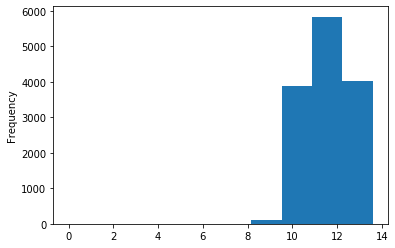

In [65]:
df["LIMIT_BAL"].plot.hist()

### Feature Engineering

In [66]:
df.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,10.308986,1,1,2,40,0,0,0,30000.0,1700.0,1600.0,1287.0,0
1,9.903538,1,1,2,41,1,2,0,20000.0,0.0,1300.0,1500.0,0
2,9.903538,1,1,2,36,0,0,0,20000.0,1580.0,1367.0,1178.0,0
3,9.903538,1,1,2,35,0,0,0,20000.0,1086.0,1000.0,0.0,0
4,12.043560,1,1,2,38,0,0,0,170000.0,18500.0,13998.0,3760.0,0


In [67]:
#mengubah features MARRIAGE, EDUCATION, SEX menjadi dummies
df['MARRIAGE'] = pd.Categorical(df['MARRIAGE'])
df['EDUCATION'] = pd.Categorical(df['EDUCATION'])
df['SEX'] = pd.Categorical(df['SEX'])

df3 = pd.get_dummies(df)

In [68]:
df3.tail(20)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2
16602,12.676079,56,1,2,2,320000.0,1300.0,0.0,1310.0,1,1,0,0,1,0,0,0,1,0
16603,12.765691,60,0,0,2,350000.0,10589.0,34.0,4400.0,1,0,1,0,0,0,1,0,1,0
16605,12.948012,60,0,0,0,420000.0,326.0,326.0,326.0,1,1,0,0,0,1,0,0,1,0
16606,12.994532,65,0,3,2,440000.0,0.0,0.0,31200.0,1,0,1,0,0,0,1,0,1,0
16607,12.736704,59,0,0,2,340000.0,3000.0,0.0,0.0,1,1,0,0,1,0,0,0,1,0
16608,12.736704,63,2,0,0,340000.0,3000.0,3428.0,2002.0,1,1,0,0,0,0,0,1,1,0
16609,12.948012,62,0,0,0,420000.0,17259.0,18600.0,1474.0,1,0,1,0,0,0,1,0,1,0
16610,12.847929,63,0,0,0,380000.0,1804.0,1804.0,1804.0,1,1,0,0,1,0,0,0,1,0
16611,12.765691,60,2,0,0,350000.0,6000.0,5500.0,5000.0,1,1,0,0,1,0,0,0,1,0
16612,12.847929,61,0,0,0,380000.0,46895.0,1775.0,51209.0,1,1,0,0,0,1,0,0,1,0


## Feature Selection
Yaitu memilih 10 feature yang penting menggunakan package f_classif

In [69]:
df4 = pd.DataFrame(SelectKBest(f_classif, k=10).fit_transform(df3.drop(["TARGET"],axis = 1),df3["TARGET"]))
df4.tail()

,0,1,2,3,4,5,6,7,8,9
13847,12.644331,57.0,0.0,0.0,0.0,310000.0,1500.0,0.0,1.0,0.0
13848,12.765691,56.0,3.0,2.0,2.0,350000.0,0.0,0.0,1.0,0.0
13849,12.847929,60.0,2.0,2.0,2.0,380000.0,7000.0,0.0,1.0,0.0
13850,12.736704,56.0,4.0,3.0,2.0,340000.0,0.0,0.0,1.0,0.0
13851,12.923915,61.0,0.0,0.0,0.0,410000.0,2078.0,0.0,1.0,0.0


In [70]:
rename = {
    0:'LIMIT_BAL',
    1:'AGE',
    2:'PAY_1',
    3:'PAY_2',
    4:'PAY_3',
    5:'BILL_AMT1',
    6:'PAY_AMT1',
    7:'EDUCATION_1',
    8:'SEX_1',
    9:'SEX_2',
}

In [71]:
df4 = df4.rename(columns=rename)
df4.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,PAY_AMT1,EDUCATION_1,SEX_1,SEX_2
0,10.308986,40.0,0.0,0.0,0.0,30000.0,1700.0,1.0,0.0,1.0
1,9.903538,41.0,1.0,2.0,0.0,20000.0,0.0,1.0,0.0,1.0
2,9.903538,36.0,0.0,0.0,0.0,20000.0,1580.0,1.0,0.0,1.0
3,9.903538,35.0,0.0,0.0,0.0,20000.0,1086.0,1.0,0.0,1.0
4,12.043560,38.0,0.0,0.0,0.0,170000.0,18500.0,1.0,0.0,1.0


## Modelling Second Try

### Create x and y variables

In [72]:
x = df4
x.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,PAY_AMT1,EDUCATION_1,SEX_1,SEX_2
0,10.308986,40.0,0.0,0.0,0.0,30000.0,1700.0,1.0,0.0,1.0
1,9.903538,41.0,1.0,2.0,0.0,20000.0,0.0,1.0,0.0,1.0
2,9.903538,36.0,0.0,0.0,0.0,20000.0,1580.0,1.0,0.0,1.0
3,9.903538,35.0,0.0,0.0,0.0,20000.0,1086.0,1.0,0.0,1.0
4,12.043560,38.0,0.0,0.0,0.0,170000.0,18500.0,1.0,0.0,1.0


In [73]:
y = df3['TARGET']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

### Split Dataset into 2 set : Train and Test
proporsi training adalah 80:20

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [75]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11081, 10)
(11081,)
(2771, 10)
(2771,)


### First try - use Decision Tree Classifier

In [76]:
dtree2 = DecisionTreeClassifier()

In [77]:
dtree2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
y_pred1 = dtree2.predict(x_test)
y_pred1

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [79]:
a1 = accuracy_score(y_test, y_pred1)
p1 = precision_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')
r1 = recall_score(y_test, y_pred1, average='macro')
print(a1)
print(p1)
print(f1)
print(r1)

0.8278599783471671
0.8223723000294803
0.8196854689297537
0.8175294626246954


### Second try - use Logistic Regression

In [80]:
logreg2 = LogisticRegression(penalty='l1') #menggunakan l1 menghapus feature yang tidak penting

In [81]:
logreg2.fit(x_train, y_train)

F:\Anaconda\envs\pandas\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
y_pred2 = logreg2.predict(x_test)
y_pred2

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [83]:
a2 = accuracy_score(y_test, y_pred2)
p2 = precision_score(y_test, y_pred2, average='macro')
f2 = f1_score(y_test, y_pred2, average='macro')
r2 = recall_score(y_test, y_pred2, average='macro')
print(a2)
print(p2)
print(f2)
print(r2)

0.7499097798628654
0.7507055453760452
0.7256500318238608
0.7192577813075263


### Third try - Naive Bayes

In [84]:
naive2 = GaussianNB()

In [85]:
naive2.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
y_pred3 = naive2.predict(x_test)
y_pred3

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [87]:
a3 = accuracy_score(y_test, y_pred3)
p3 = precision_score(y_test, y_pred3, average='macro')
f3 = f1_score(y_test, y_pred3, average='macro')
r3 = recall_score(y_test, y_pred3, average='macro')
print(a3)
print(p3)
print(f3)
print(r3)

0.7459400938289427
0.7450086692493806
0.7432238335727193
0.7547684108222664


### Fourth Try - KNN

In [88]:
k_range = range(1,25)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.7376398412125587, 0.7452183327318658, 0.7585709130277878, 0.7647058823529411, 0.7614579574160952, 0.7661494045470949, 0.7621797185131721, 0.7668711656441718, 0.7686755683868639, 0.7719234933237098, 0.7722843738722482, 0.7740887766149405, 0.7697582100324792, 0.7701190905810177, 0.7701190905810177, 0.7697582100324792, 0.7650667629014796, 0.765427643450018, 0.7686755683868639, 0.7686755683868639, 0.7636232407073259, 0.7647058823529411, 0.7614579574160952, 0.7661494045470949]


Text(0, 0.5, 'Testing Accuracy')

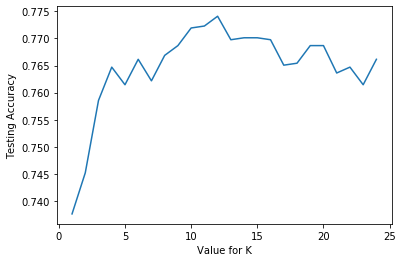

In [89]:
plt.plot(k_range, scores)
plt.xlabel('Value for K')
plt.ylabel('Testing Accuracy')

In [90]:
knn_8 = KNeighborsClassifier(n_neighbors=8)

In [91]:
knn_8.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [92]:
y_pred4 = knn_8.predict(x_test)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
a4 = accuracy_score(y_test, y_pred4)
p4 = precision_score(y_test, y_pred4, average='macro')
f4 = f1_score(y_test, y_pred4, average='macro')
r4 = recall_score(y_test, y_pred4, average='macro')
print(a4)
print(p4)
print(f4)
print(r4)

0.7668711656441718
0.7688489772881368
0.7454990536894737
0.7384408564286867


### Five Try - Random Forest

In [94]:
randomf2 = RandomForestClassifier()

In [95]:
randomf2.fit(x_train, y_train)

F:\Anaconda\envs\pandas\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
y_pred5 = randomf2.predict(x_test)
y_pred5

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [97]:
a5 = accuracy_score(y_test, y_pred5)
p5 = precision_score(y_test, y_pred5, average='macro')
f5 = f1_score(y_test, y_pred5, average='macro')
r5 = recall_score(y_test, y_pred5, average='macro')
print(a5)
print(p5)
print(f5)
print(r5)

0.8545651389390112
0.8518454711302865
0.8470558909914407
0.8435360458703569


### Summarizing Score for Second Try Modelling

In [98]:
score_2 = pd.DataFrame({
    'Model': ['Decision Tree','Logistic Regression', 'Naive Bayes', 'KNN', 'Random Forest'],
    'Accuracy Score': [a1,a2,a3,a4,a5],
    'Recall Score' : [r1,r2,r3,r4,r5],
    'F1 Score' : [f1,f2,f3,f4,f5],
    'Precision Score' : [p1,p2,p3,p3,p4]
})
score_2

,Model,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Decision Tree,0.827860,0.817529,0.819685,0.822372
1,Logistic Regression,0.749910,0.719258,0.725650,0.750706
2,Naive Bayes,0.745940,0.754768,0.743224,0.745009
3,KNN,0.766871,0.738441,0.745499,0.745009
4,Random Forest,0.854565,0.843536,0.847056,0.768849


### Conclusion Second Try Modelling
2. Dengan menggunakan feature engineering dan feature selection f_classif didapatkan bahwa nilai kebaikan dari Naive bayes meningkat secara drastis dan Logistic regression meningkat secara sedikit. selain algoritma itu, mengalami penurunan

## Conclusion and Selected Model:

- Performance matrix yang akan saya gunakan adalah RECALL.
    1. F1 score : Weighted mean of Recall and Precision
    2. Recall : (TP/TP+FN)
    3. Precision : (TP/TP+FP) TP = true positive, FN = false negative,FP = false positive 
- disini kita akan mengurangi nilai dari FN. contohnya adalah kita memprediksi bahwa kredit akan dibayar tetapi kenyataanya adalah tidak dibayar atau penipuan. caranya mengurangi FN adalah menggunakan Pengukuran RECALL

In [99]:
score_1 #algoritma sebelum dilakukan Feature Engineering

,Model,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Decision Tree,0.841203,0.832545,0.831829,0.831148
1,Logistic Regression,0.754887,0.721841,0.728645,0.744670
2,Naive Bayes,0.549474,0.625409,0.536752,0.675550
3,KNN,0.774737,0.753185,0.756928,0.675550
4,Random Forest,0.871880,0.855438,0.861481,0.762342


In [100]:
score_2 #algoritma setelah dilakukan Feature Engineering

,Model,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Decision Tree,0.827860,0.817529,0.819685,0.822372
1,Logistic Regression,0.749910,0.719258,0.725650,0.750706
2,Naive Bayes,0.745940,0.754768,0.743224,0.745009
3,KNN,0.766871,0.738441,0.745499,0.745009
4,Random Forest,0.854565,0.843536,0.847056,0.768849


- Karena saya akan menggunakan nilai dari RECALL, maka algoritma yang akan saya implementasikan adalah Random Forest sebelum dilakukan Feature Engineering

### Selected Model : Random Forest (randomf) Before Feature Engineering

## Export Model

In [101]:
from sklearn.externals import joblib

F:\Anaconda\envs\pandas\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [102]:
joblib.dump(randomf, 'random_forest_before.pkl')

['random_forest_before.pkl']